# Solemne 3 y Recuperativa
### LSTM para Estacion Meteorologica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data.csv')
df

,fecha,gas,temperatura,humedad,luminosidad,presion
0,1731686936454,592,28,47,485,94.76
1,1731686997476,765,28,46,529,94.76
2,1731687058489,695,28,46,508,94.76
3,1731687119511,535,28,46,510,94.77
4,1731687180982,528,28,46,510,94.76
...,...,...,...,...,...,...
8938,1732232384753,2905,27,41,307,95.11
8939,1732232445443,3103,27,41,310,95.11
8940,1732232506926,2868,27,41,311,95.11
8941,1732232568043,3055,27,41,330,95.11


# Transformar fechas Unix a datetime

In [3]:
df["fecha"] = pd.to_datetime(df["fecha"],unit="ms")
start_date = df["fecha"][0].replace(second=0,microsecond=0)
df["fecha"] = pd.date_range(start=start_date,periods=len(df),freq='T')

# Extraer componentes temporales

#df['dayofweek'] = df['fecha'].dt.dayofweek  # 0 = lunes, 6 = domingo
#df['month'] = df['fecha'].dt.month
#df['day'] = df['fecha'].dt.day

df

C:\Users\Nico\AppData\Local\Temp\ipykernel_14680\3326514680.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df["fecha"] = pd.date_range(start=start_date,periods=len(df),freq='T')


,fecha,gas,temperatura,humedad,luminosidad,presion
0,2024-11-15 16:08:00,592,28,47,485,94.76
1,2024-11-15 16:09:00,765,28,46,529,94.76
2,2024-11-15 16:10:00,695,28,46,508,94.76
3,2024-11-15 16:11:00,535,28,46,510,94.77
4,2024-11-15 16:12:00,528,28,46,510,94.76
...,...,...,...,...,...,...
8938,2024-11-21 21:06:00,2905,27,41,307,95.11
8939,2024-11-21 21:07:00,3103,27,41,310,95.11
8940,2024-11-21 21:08:00,2868,27,41,311,95.11
8941,2024-11-21 21:09:00,3055,27,41,330,95.11


In [4]:
df['hora'] = df['fecha'].dt.hour
df

,fecha,gas,temperatura,humedad,luminosidad,presion,hora
0,2024-11-15 16:08:00,592,28,47,485,94.76,16
1,2024-11-15 16:09:00,765,28,46,529,94.76,16
2,2024-11-15 16:10:00,695,28,46,508,94.76,16
3,2024-11-15 16:11:00,535,28,46,510,94.77,16
4,2024-11-15 16:12:00,528,28,46,510,94.76,16
...,...,...,...,...,...,...,...
8938,2024-11-21 21:06:00,2905,27,41,307,95.11,21
8939,2024-11-21 21:07:00,3103,27,41,310,95.11,21
8940,2024-11-21 21:08:00,2868,27,41,311,95.11,21
8941,2024-11-21 21:09:00,3055,27,41,330,95.11,21


# Promediar 60 Min

In [5]:
# Establecer timestamp como índice
df.set_index('fecha', inplace=True)

In [6]:
df

,gas,temperatura,humedad,luminosidad,presion,hora
fecha,,,,,,
2024-11-15 16:08:00,592,28,47,485,94.76,16
2024-11-15 16:09:00,765,28,46,529,94.76,16
2024-11-15 16:10:00,695,28,46,508,94.76,16
2024-11-15 16:11:00,535,28,46,510,94.77,16
2024-11-15 16:12:00,528,28,46,510,94.76,16
...,...,...,...,...,...,...
2024-11-21 21:06:00,2905,27,41,307,95.11,21
2024-11-21 21:07:00,3103,27,41,310,95.11,21
2024-11-21 21:08:00,2868,27,41,311,95.11,21


In [7]:
df_resampled = df.resample('60T').mean()
df_resampled

C:\Users\Nico\AppData\Local\Temp\ipykernel_14680\3362586963.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('60T').mean()


,gas,temperatura,humedad,luminosidad,presion,hora
fecha,,,,,,
2024-11-15 16:00:00,561.057692,28.000000,44.923077,544.000000,94.758654,16.0
2024-11-15 17:00:00,482.183333,28.250000,43.050000,635.383333,94.739000,17.0
2024-11-15 18:00:00,441.183333,29.000000,41.566667,675.816667,94.719833,18.0
2024-11-15 19:00:00,419.400000,29.000000,40.683333,621.833333,94.686000,19.0
2024-11-15 20:00:00,396.983333,28.966667,40.783333,482.083333,94.658667,20.0
...,...,...,...,...,...,...
2024-11-21 17:00:00,900.316667,28.083333,40.016667,754.400000,95.003333,17.0
2024-11-21 18:00:00,937.533333,28.250000,42.566667,337.750000,95.018500,18.0
2024-11-21 19:00:00,933.683333,28.166667,40.450000,387.433333,95.056167,19.0


# Fechas Ciclicas

In [8]:
df = df_resampled
# Codificar la hora del día de manera cíclica
df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)  # 24 horas en un día
df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)

# Codificar el día de la semana de manera cíclica
# df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)  # 7 días en una semana
# df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# # Codificar el mes del año de manera cíclica
# df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)  # 12 meses en un año
# df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Ahora df contiene las variables cíclicas
print(df)


                             gas  temperatura    humedad  luminosidad  \
fecha                                                                   
2024-11-15 16:00:00   561.057692    28.000000  44.923077   544.000000   
2024-11-15 17:00:00   482.183333    28.250000  43.050000   635.383333   
2024-11-15 18:00:00   441.183333    29.000000  41.566667   675.816667   
2024-11-15 19:00:00   419.400000    29.000000  40.683333   621.833333   
2024-11-15 20:00:00   396.983333    28.966667  40.783333   482.083333   
...                          ...          ...        ...          ...   
2024-11-21 17:00:00   900.316667    28.083333  40.016667   754.400000   
2024-11-21 18:00:00   937.533333    28.250000  42.566667   337.750000   
2024-11-21 19:00:00   933.683333    28.166667  40.450000   387.433333   
2024-11-21 20:00:00  1439.850000    27.983333  39.416667   401.966667   
2024-11-21 21:00:00  2929.818182    27.454545  42.272727   313.000000   

                       presion  hora  hora_sin    

In [9]:
#Revisar NULOS
df.isnull().sum()

gas            0
temperatura    0
humedad        0
luminosidad    0
presion        0
hora           0
hora_sin       0
hora_cos       0
dtype: int64

In [10]:
#Cantidad de datos
df.count()

gas            150
temperatura    150
humedad        150
luminosidad    150
presion        150
hora           150
hora_sin       150
hora_cos       150
dtype: int64

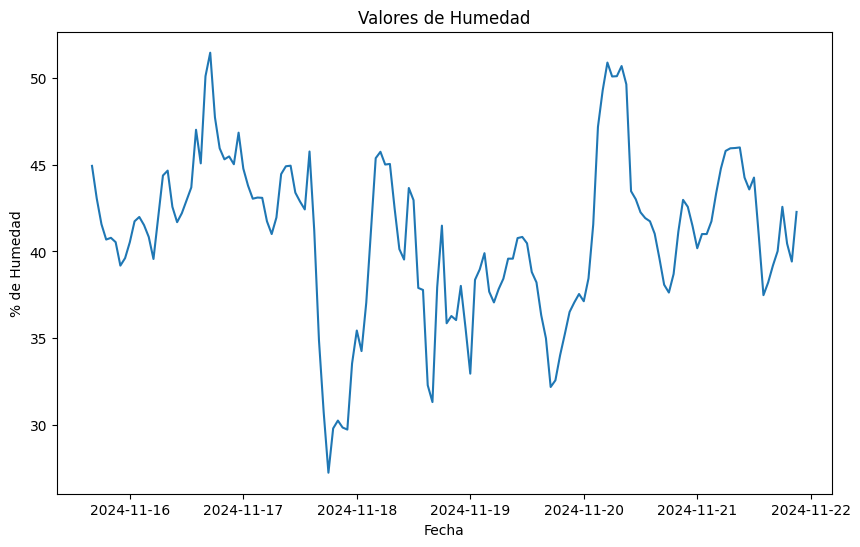

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df["humedad"])
plt.xlabel("Fecha")
plt.ylabel("% de Humedad")
plt.title("Valores de Humedad")
plt.show()

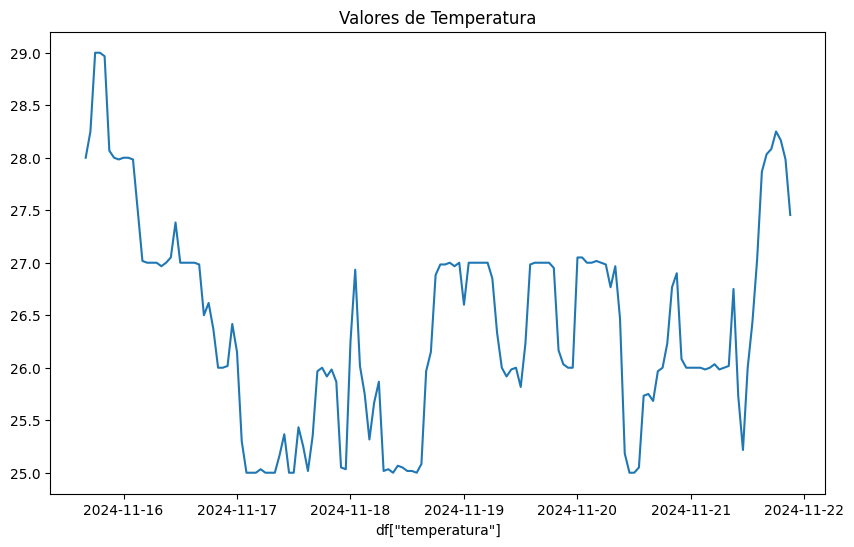

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df["temperatura"])
plt.xlabel("df[\"temperatura\"]")
plt.title("Valores de Temperatura")
plt.show()

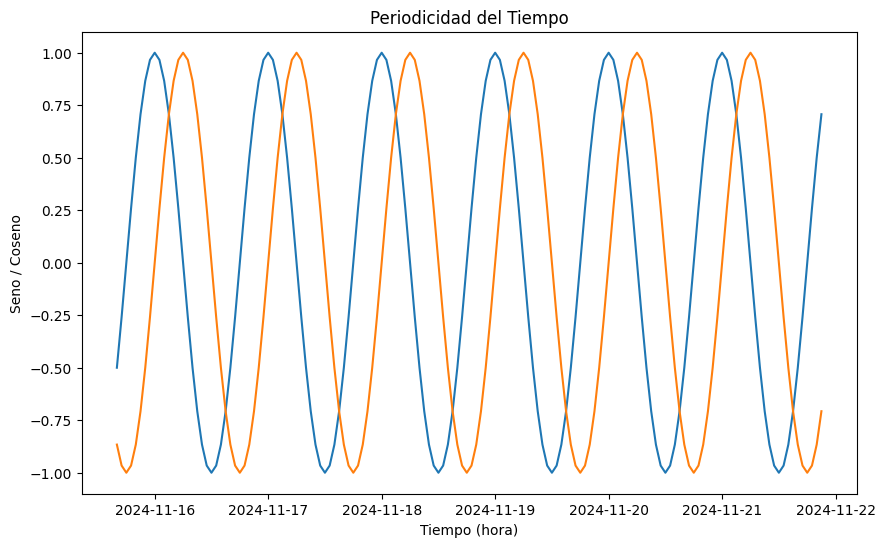

In [13]:
#Ciclo dia y noche
plt.figure(figsize=(10,6))
plt.plot(df["hora_cos"])
plt.plot(df["hora_sin"])
plt.xlabel("Tiempo (hora)")
plt.ylabel("Seno / Coseno")
plt.title("Periodicidad del Tiempo")
plt.show()

# PreProcesado

* Limpiar y Generar indice

In [14]:
df.columns

Index(['gas', 'temperatura', 'humedad', 'luminosidad', 'presion', 'hora',
       'hora_sin', 'hora_cos'],
      dtype='object')

In [15]:
df_clean = df.drop(columns=["hora"])
df_clean = df_clean.reset_index(drop=True)
df_clean

,gas,temperatura,humedad,luminosidad,presion,hora_sin,hora_cos
0,561.057692,28.000000,44.923077,544.000000,94.758654,-0.866025,-5.000000e-01
1,482.183333,28.250000,43.050000,635.383333,94.739000,-0.965926,-2.588190e-01
2,441.183333,29.000000,41.566667,675.816667,94.719833,-1.000000,-1.836970e-16
3,419.400000,29.000000,40.683333,621.833333,94.686000,-0.965926,2.588190e-01
4,396.983333,28.966667,40.783333,482.083333,94.658667,-0.866025,5.000000e-01
...,...,...,...,...,...,...,...
145,900.316667,28.083333,40.016667,754.400000,95.003333,-0.965926,-2.588190e-01
146,937.533333,28.250000,42.566667,337.750000,95.018500,-1.000000,-1.836970e-16
147,933.683333,28.166667,40.450000,387.433333,95.056167,-0.965926,2.588190e-01
148,1439.850000,27.983333,39.416667,401.966667,95.109000,-0.866025,5.000000e-01


* Escalar datos

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
df_scaled = scaler.fit_transform(df_clean.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(df_clean.columns))


objetivo = df_clean["temperatura"].to_numpy()
objetivo = objetivo.reshape(-1,1)

target_scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled['temperatura'] = target_scaler.fit_transform(objetivo)
df_scaled = df_scaled.astype(float)

df_scaled

,gas,temperatura,humedad,luminosidad,presion,hora_sin,hora_cos
0,-0.849979,0.500000,0.461220,0.106384,-0.600449,-0.866025,-5.000000e-01
1,-0.911579,0.625000,0.306207,0.292239,-0.678595,-0.965926,-2.588190e-01
2,-0.943599,1.000000,0.183448,0.374472,-0.754805,-1.000000,-1.836970e-16
3,-0.960612,1.000000,0.110345,0.264681,-0.889331,-0.965926,2.588190e-01
4,-0.978119,0.983333,0.118621,-0.019541,-0.998012,-0.866025,5.000000e-01
...,...,...,...,...,...,...,...
145,-0.585021,0.541667,0.055172,0.534295,0.372432,-0.965926,-2.588190e-01
146,-0.555955,0.625000,0.266207,-0.313086,0.432737,-1.000000,-1.836970e-16
147,-0.558962,0.583333,0.091034,-0.212040,0.582505,-0.965926,2.588190e-01
148,-0.163651,0.491667,0.005517,-0.182482,0.792578,-0.866025,5.000000e-01


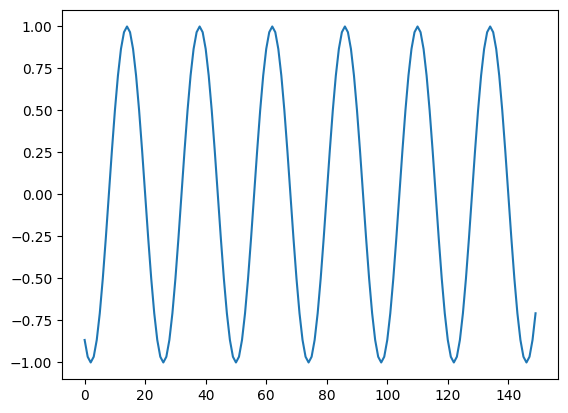

In [17]:
plt.plot(df_scaled["hora_sin"])

# Exportar Scaler para denormalizacion a futuro

In [18]:
import joblib
joblib.dump(target_scaler,'../out/target-scaler.gz')

['../out/target-scaler.gz']

* Preparación de Datos

In [19]:
def split_series(series, n_past, n_future,columns):
    """
    Splits a time series into past and future windows.

    Args:
        series (numpy.ndarray): The time series to be split.
        n_past (int): The number of past observations in each window.
        n_future (int): The number of future observations in each window.

    Returns:
        tuple: A tuple of numpy arrays containing the past and future windows.
    """
    X, y = [], []  # initialize empty lists to store past and future windows
    for window_start in range(len(series)):
        past_end = window_start + n_past  # end index of past window
        future_end = past_end + n_future  # end index of future window
        if future_end > len(series):  # if future window extends beyond series, break loop
            break
        #print(window_start,past_end,future_end)

        past, future = series[window_start:past_end, :], series[past_end:future_end, :]  # slice past and future windows
        future = future[:][:,0:2] #Solamente temperatura y humedad
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)  # convert lists to numpy arrays and return as tuple



* Separación de datos

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_scaled.drop(columns=["temperatura"])
y = df_scaled["temperatura"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

# Implementación de Modelo

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [24]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
y_pred = model.predict(X_test)

# Desempeño del modelo

In [26]:
mean_squared_error(y_test,y_pred)

np.float64(0.23912622436486072)

In [27]:
y_pred=pd.Series(y_pred,index=y_test.index)

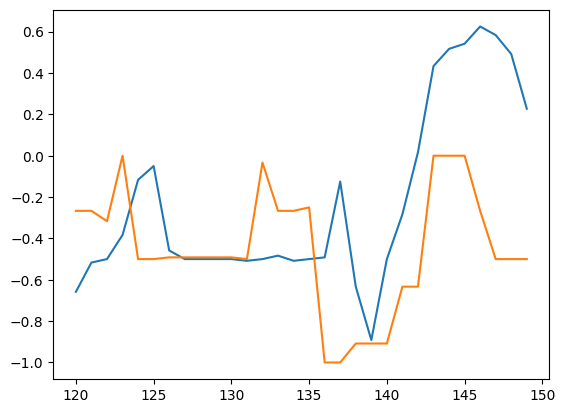

In [28]:
plt.plot(y_test)
plt.plot(y_pred)

# Denormalización Algebraica

In [29]:
temperaturas = target_scaler.inverse_transform(y_test.values.reshape(-1,1))
prediccion = target_scaler.inverse_transform(y_pred.values.reshape(-1,1))

Text(0.5, 0, 'Muestras')

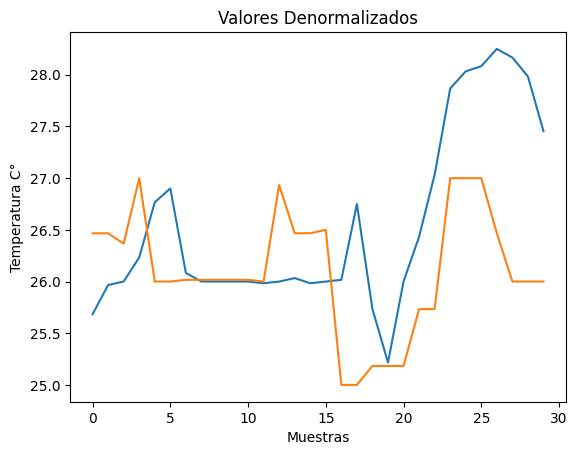

In [30]:
plt.plot(temperaturas)
plt.plot(prediccion)
plt.title("Valores Denormalizados")
plt.ylabel("Temperatura C°")
plt.xlabel("Muestras")

# Exportar Modelo

In [35]:
MACHINE_MODEL_PATH = "../out/MACHINE_MODEL"


In [36]:
joblib.dump(model,MACHINE_MODEL_PATH,compress=3)

PermissionError: [Errno 13] Permission denied: '../out/MACHINE_MODEL'

# Cargar Modelo

In [ ]:
modelo_cargado = joblib.load(MACHINE_MODEL_PATH)
modelo_cargado.predict(X_test)

NameError: name 'joblib' is not defined